Tarea N°2 Ignacio Molina, en colaboración con Jorge Farias y Nicolas Guede

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [33]:
data= pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')
## abro la data

In [34]:
data.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,31735.0,12819.5
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,234.0,NaN


In [35]:
dataRM = data[data['Region'] == 'Metropolitana']
dataRM.head()
## filto por region

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,820.0,823.0,822.0,825.0,826.0,827.0,827.0,827.0,828.0,11181.6
89,Metropolitana,13,Buin,13402.0,109641.0,7.0,8.0,14.0,20.0,20.0,...,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0,11786.0,11828.0,11841.0,10799.8
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,6.0,7.0,7.0,7.0,8.0,...,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0,2813.0,2824.0,2829.0,9917.6
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,4.0,4.0,5.0,11.0,...,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0,9206.0,9213.0,9227.0,10372.5
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,19.0,21.0,26.0,31.0,36.0,...,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0,19606.0,19644.0,19666.0,13804.1


In [36]:
dataRM = dataRM.drop(["Codigo region","Codigo comuna","Poblacion","Tasa"], axis=1)
## elimino columnas innecesarias

In [37]:
dataRM.head()

,Region,Comuna,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06
88,Metropolitana,Alhue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,815.0,820.0,823.0,822.0,825.0,826.0,827.0,827.0,827.0,828.0
89,Metropolitana,Buin,7.0,8.0,14.0,20.0,20.0,29.0,36.0,40.0,...,11397.0,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0,11786.0,11828.0,11841.0
90,Metropolitana,Calera de Tango,6.0,7.0,7.0,7.0,8.0,8.0,10.0,10.0,...,2653.0,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0,2813.0,2824.0,2829.0
91,Metropolitana,Cerrillos,0.0,4.0,4.0,5.0,11.0,21.0,29.0,39.0,...,8884.0,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0,9206.0,9213.0,9227.0
92,Metropolitana,Cerro Navia,19.0,21.0,26.0,31.0,36.0,42.0,57.0,65.0,...,19056.0,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0,19606.0,19644.0,19666.0


In [38]:
dataRM = dataRM.melt(id_vars=["Region","Comuna"], var_name = "fecha", value_name = 'Casos') 
dataRM
## modifico la data para obtner una sola columna de valores 

,Region,Comuna,fecha,Casos
0,Metropolitana,Alhue,2020-03-30,0.0
1,Metropolitana,Buin,2020-03-30,7.0
2,Metropolitana,Calera de Tango,2020-03-30,6.0
3,Metropolitana,Cerrillos,2020-03-30,0.0
4,Metropolitana,Cerro Navia,2020-03-30,19.0
...,...,...,...,...
9482,Metropolitana,Santiago,2021-12-06,49823.0
9483,Metropolitana,Talagante,2021-12-06,6110.0
9484,Metropolitana,Tiltil,2021-12-06,2120.0
9485,Metropolitana,Vitacura,2021-12-06,6074.0


In [39]:
dataRM['fecha'] = pd.to_datetime(dataRM['fecha'])

In [40]:
casos= dataRM.groupby('Region').resample('W-Mon', on='fecha').sum().reset_index().sort_values(by='fecha')
casos
## acumulo los valores

,Region,fecha,Casos
0,Metropolitana,2020-03-30,1180.0
1,Metropolitana,2020-04-06,5405.0
2,Metropolitana,2020-04-13,9524.0
3,Metropolitana,2020-04-20,14740.0
4,Metropolitana,2020-04-27,14521.0
...,...,...,...
84,Metropolitana,2021-11-08,1751393.0
85,Metropolitana,2021-11-15,1769738.0
86,Metropolitana,2021-11-22,1783954.0
87,Metropolitana,2021-11-29,1796781.0


In [41]:
casos["RestaCasos"] = casos["Casos"]-casos["Casos"].shift()

In [42]:
casos

,Region,fecha,Casos,RestaCasos
0,Metropolitana,2020-03-30,1180.0,NaN
1,Metropolitana,2020-04-06,5405.0,4225.0
2,Metropolitana,2020-04-13,9524.0,4119.0
3,Metropolitana,2020-04-20,14740.0,5216.0
4,Metropolitana,2020-04-27,14521.0,-219.0
...,...,...,...,...
84,Metropolitana,2021-11-08,1751393.0,17440.0
85,Metropolitana,2021-11-15,1769738.0,18345.0
86,Metropolitana,2021-11-22,1783954.0,14216.0
87,Metropolitana,2021-11-29,1796781.0,12827.0


In [43]:
datalimpia=casos[casos["RestaCasos"]>0].reset_index()
datalimpia.drop('index', axis=1, inplace=True)
datalimpia.drop('Casos', axis=1, inplace=True)

datalimpia

,Region,fecha,RestaCasos
0,Metropolitana,2020-04-06,4225.0
1,Metropolitana,2020-04-13,4119.0
2,Metropolitana,2020-04-20,5216.0
3,Metropolitana,2020-05-04,9443.0
4,Metropolitana,2020-05-11,15225.0
...,...,...,...
81,Metropolitana,2021-11-08,17440.0
82,Metropolitana,2021-11-15,18345.0
83,Metropolitana,2021-11-22,14216.0
84,Metropolitana,2021-11-29,12827.0


se obtiene que el Ouliers que se dispara es de 253289.0 contagios


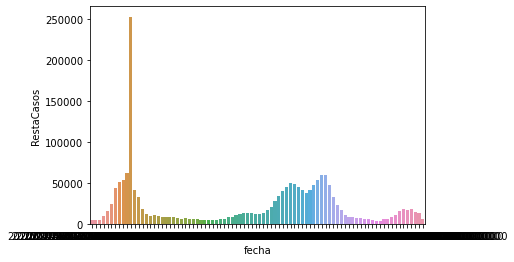

In [44]:
sns.barplot(x="fecha", y="RestaCasos", data=datalimpia)
maxs = datalimpia["RestaCasos"].max()
print("se obtiene que el Ouliers que se dispara es de",maxs,"contagios")

In [45]:
primeraC = datalimpia[datalimpia["fecha"]< "2020-09-10"]

In [46]:
primeraC

,Region,fecha,RestaCasos
0,Metropolitana,2020-04-06,4225.0
1,Metropolitana,2020-04-13,4119.0
2,Metropolitana,2020-04-20,5216.0
3,Metropolitana,2020-05-04,9443.0
4,Metropolitana,2020-05-11,15225.0
5,Metropolitana,2020-05-18,24398.0
6,Metropolitana,2020-05-25,43522.0
7,Metropolitana,2020-06-01,50829.0
8,Metropolitana,2020-06-08,53049.0
9,Metropolitana,2020-06-15,62744.0


se obtiene que dentro de la primera cuatentena, el Ouliers que se dispara es de 253289.0 contagios


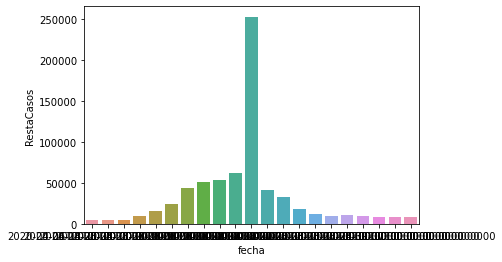

In [32]:
sns.barplot(x="fecha", y="RestaCasos", data=primeraC)
maxs1 = primeraC["RestaCasos"].max()
print("se obtiene que dentro de la primera cuatentena, el Ouliers que se dispara es de",maxs1,"contagios")